# Tutorial: Batch Processing

This tutorial explains how to use the batch processing script to solve CommonRoad planning problems in parallel. The configuration for batch processing is stored in `batch_processing_config.yaml`. Some of the parameters are explained as follows:
* **input_path**: input directory of your intended CommonRoad scenarios.
* **output_path**: output directory of CommonRoad solution files.
* **overwrite**: whether the existing solution files should be overwritten.
* **validate_solution**: check the validity of the solutions with the feasibility checker.
* **num_worker_processes**: the number of parallel executions of motion planners.

Parameters specified under the `default` block will be applied to all scenarios. If you wish to specify a different paramter for specific scenarios, simply insert a new block with the content of the `default` block copied, and overwrite parameters therein. This new block should be named after the ID of the sceanrio that you wish to aplly the parameters to. Related parameters are explained as follows:
* **vehicle_model**: model of the vehicle, valid values: **PM, KS, ST and MB**. Refer to [Vehicle Models](https://gitlab.lrz.de/tum-cps/commonroad-vehicle-models/-/blob/master/vehicleModels_commonRoad.pdf) for more information.
* **vehicle_type**: type of the vehicle, valid values: **FORD_ESCORT, BMW_320i and VW_VANAGON**.
* **cost_function**: id of cost function. Refer to [Cost Functions](https://gitlab.lrz.de/tum-cps/commonroad-cost-functions/-/blob/master/costFunctions_commonRoad.pdf) for more information.
* **planner**: the planner that is used to solve for solutions, possible values are: bfs, dfs, dls, ucs, gbfs, astar, student, student_example
* **planning_problem_idx**: index of the planning problem. for cooperative scenarios: 0, 1, 2, ..., otherwise: 0
* **max_tree_depth**: maximum depth of the search tree
* **timeout**: timeout time for motion planner [s].

Note: the paths can either be **relative** or **absolute**.
To start the search with batch processing, you can either directly run `SMP/batch_processing/batch_processing_parallel.py` in IDEs (e.g. PyCharm) with `commonroad-search/` marked as sources root, or run the following script.

## Parallel Batch Processing
In parallel batch processing, the search are carried out on multiple threads simultaneously. This reduces the overall time required to test your algorithm on all the given scenarios. One drawback is that it is not very easy to debug your code with parallel batch processing.

In [32]:
%load_ext autoreload
%autoreload 2

import os
import sys

# add the folder containing batch processing script into python path
sys.path.append(os.path.join(os.getcwd(), "../../"))

from SMP.batch_processing.batch_processing_parallel import run_parallel_processing

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
run_parallel_processing()

Config file loaded and logger created.
ScenarioLoader Mode <DEFAULT>
Run on all scenarios, except the skipped scenarios
Number of scenarios: 2
Automaton loaded for vehicle type: BMW_320i
Motion planner: astar
Number of parallel processes: 2

Scenario being processed:	         1
Solution found:               	         0
Solution found but invalid:   	         0
Solution not found:           	         0
Exception occurred:           	         0
Time out:                     	         0
here
here

Scenario being processed:	         2
Solution found:               	         0
Solution found but invalid:   	         0
Solution not found:           	         0
Exception occurred:           	         0
Time out:                     	         0
list index out of range
hey bitch heyyy
==============================        Search Results        ==============================
==============================           Time out           ==============================
	- ZAM_Tutorial_Urban-3_2

====

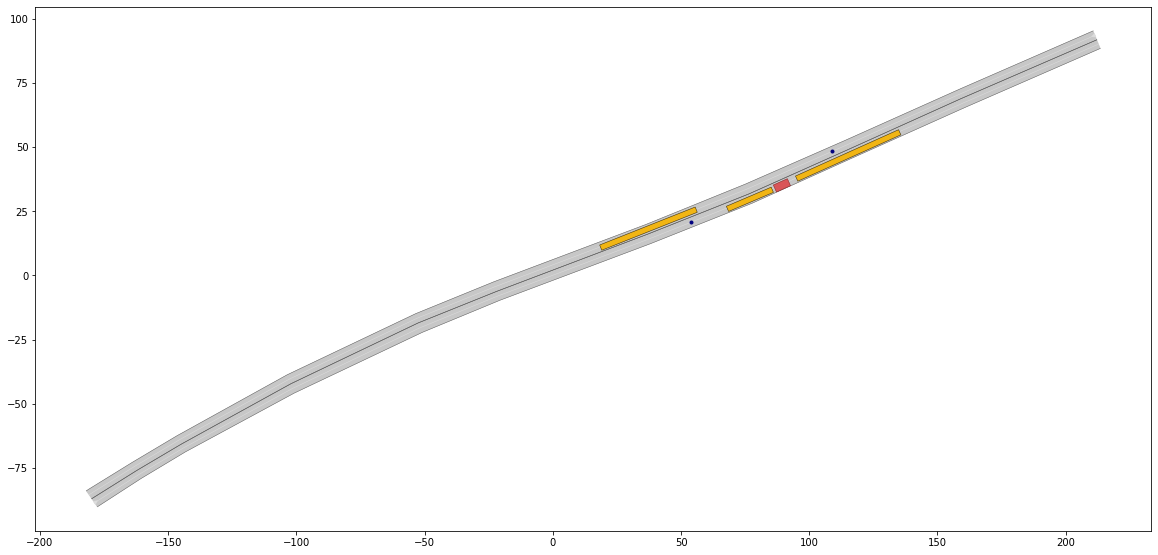

In [22]:
import os
import matplotlib.pyplot as plt
from IPython import display
from commonroad.common.file_reader import CommonRoadFileReader
from commonroad.visualization.draw_dispatch_cr import draw_object
import numpy as np


# generate path of the file to be opened
file_path = "../../commonroad-scenarios-master/C-DEU_B471-1_1_T-1.xml"

# read in the scenario and planning problem set
scenario, planning_problem_set = CommonRoadFileReader(file_path).open()

for i in range(0, 100):

    # uncomment to clear previous graph
    display.clear_output(wait=True)
    
    plt.figure(figsize=(20, 10))
    # plot the scenario at different time step
    draw_object(scenario, draw_params={'time_begin': i})
    # plot the planning problem set
    draw_object(planning_problem_set)
    axis = plt.gca()
    axis.set_aspect("equal")
    plt.show()

In [14]:
for state in scenario.obstacle_by_id(-1).prediction.trajectory.state_list:
    print(state.position)

[-10.9936 -24.7063]
[-11.237497 -25.468215]
[-11.481395 -26.23013 ]
[-11.725292 -26.992044]
[-11.969189 -27.753959]
[-12.213087 -28.515874]
[-12.458383 -29.277338]
[-12.712061 -30.036043]
[-12.982427 -30.788945]
[-13.277628 -31.532434]
[-13.605525 -32.262057]
[-13.954091 -32.937289]
[-14.301723 -33.521587]
[-14.640183 -34.016889]
[-14.960026 -34.426782]
[-15.251421 -34.756375]
[-15.533897 -35.039497]
[-15.833874 -35.303985]
[-16.151718 -35.546683]
[-16.487327 -35.764122]
[-16.840025 -35.952539]
[-17.208083 -36.108843]
[-17.588006 -36.233627]
[-17.976443 -36.328727]
[-18.370628 -36.396241]
[-18.768335 -36.438435]
[-19.207816 -36.458404]
[-19.727665 -36.450117]
[-20.325688 -36.402713]
[-20.998751 -36.30659 ]
[-21.743189 -36.154118]
[-22.516997 -35.951415]
[-23.281076 -35.714555]
[-24.036895 -35.452455]
[-24.786757 -35.17372 ]
[-25.533506 -34.886729]
[-26.279727 -34.598366]
[-27.025949 -34.310002]
[-27.77217  -34.021639]
[-28.518392 -33.733276]
[-29.264613 -33.444913]
[-30.010835 -33.1565

## Sequential Batch Processing

Alternatively, one can use the `SMP/batch_processing/batch_processing_sequential.py` script to carry out the search sequentially on a single thread. This is a more user-friendly approach if you wish you debug your code in IDES (e.g. creating breakpoints in PyCharm) but still have it run against multiple scenarios.

In [ ]:
from SMP.batch_processing.batch_processing_sequential import run_sequential_processing
run_sequential_processing()